In [120]:
import vk  # Загружаем библиотеку vk

In [121]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

In [122]:
personal_token = "694665bc9f22c8045de619f7b0b7221abeacf1946fa2a4b15e22b5537b1d4bda98761659cc5f127a86d3e"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [123]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [124]:
members = get_members("afishapicnic")
                      
members[:10]
                      
                 

[{'id': 34,
  'first_name': 'Tatyana',
  'last_name': 'Plutalova',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'id34',
  'bdate': '2.6',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1100,
  'first_name': 'Artur',
  'last_name': 'Lomaraynen',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'id1100',
  'bdate': '21.11',
  'city': {'id': 221, 'title': 'Turku'},
  'country': {'id': 207, 'title': 'Finland'}},
 {'id': 1181,
  'first_name': 'Dusya',
  'last_name': 'Gorbovskaya',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'domain': 'dusia',
  'bdate': '7.4',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'}},
 {'id': 1192,
  'first_name': 'Mikhail',
  'last_name': 'Morozov',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'domain': 'mishka.morozov',
  'bdate': '8.1',
  'city': {'id': 2, 'title': 'Sain

In [125]:
len(members)

39648

In [126]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [127]:
save_members_to_file ("saved_members.tsv", members)

In [128]:
save_members_to_file ("picnicafishi.saved_members.tsv", members)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import pandas as pd

df = pd.read_csv("picnicafishi.saved_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [131]:
df.head(10)

id     name      surname sex birth              city  country
0    34,  Tatyana    Plutalova   F     -  Saint Petersburg   Russia
1  1100,    Artur   Lomaraynen   M     -             Turku  Finland
2  1181,    Dusya  Gorbovskaya   F     -  Saint Petersburg   Russia
3  1192,  Mikhail      Morozov   M     -  Saint Petersburg   Russia
4  1242,   Philip    Denisenko   M  1988  Saint Petersburg   Russia
5  1389,     Ivan    Bezborody   M  1986   Nizhny Novgorod   Russia
6  1422,    Masha      Egorova   F     -  Saint Petersburg   Russia
7  1434,      Iya    Bakuradze   F     -                 -   Russia
8  1570,     Anna    Bashilova   F     -  Saint Petersburg   Russia
9  1607,     Olya     Smirnova   F     -  Saint Petersburg   Russia

In [132]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              13242
Saint Petersburg     3369
Nizhny Novgorod       497
Yekaterinburg         351
Voronezh              299
Kazan                 291
Samara                278
Rostov-on-Don         250
Krasnodar             220
Minsk                 209
Perm                  206
Novosibirsk           177
Kyiv                  176
Tula                  172
Yaroslavl             149
Ryazan                146
Ufa                   135
Volgograd             124
Chelyabinsk           121
Tver                  116
Name: city, dtype: int64


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
import pandas as pd


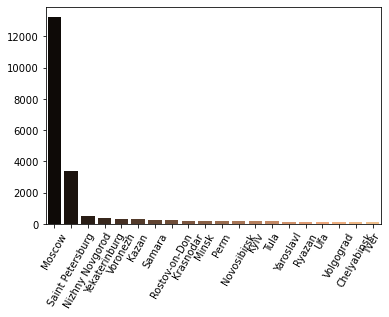

In [135]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

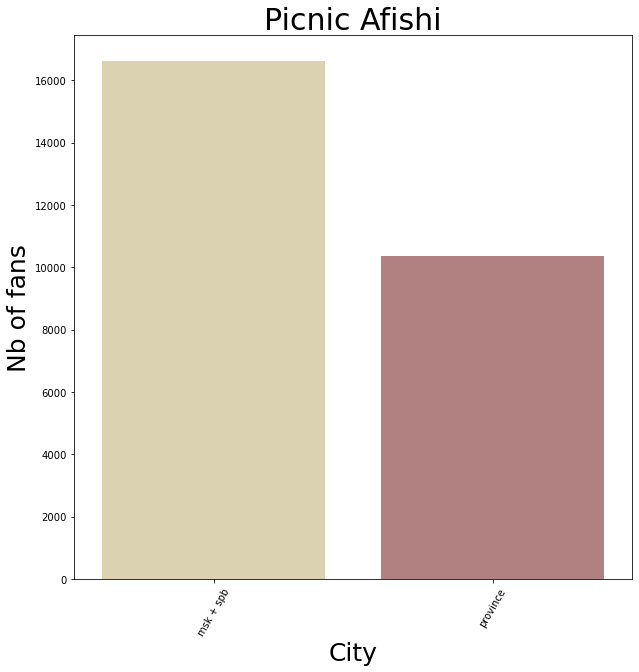

In [301]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('Picnic Afishi', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here


In [302]:
with open("../Our_project-main/boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../Our_project-main/bolbfest_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../Our_project-main/picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("../Our_project-main/parklive_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")


In [303]:
members3=set(members3)
members2=set(members2)
members1=set(members1)
members4=set(members4)


In [304]:
united_members = members1.union(members2).union(members3).union(members4)


In [305]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)


In [306]:
with open("intersection.tsv", "w", encoding="utf-8") as f:
    for i in intersected_members:
        print (i+"\n")



20197498,	Regina	George	F	-	-	-

380354715,	All	Fest	M	1973	-	-

272457196,	DELETED		F	-	-	-

450434415,	DELETED		M	-	-	-

398388997,	DELETED		M	-	-	-

559929829,	Ann	Nomad	F	2000	-	-

10638063,	DELETED		M	-	-	-

390444756,	Roman	Aynutdinov	M	-	-	-

2209816,	Anastasia	Filippova	F	-	-	-

8090090,	Mary	Stepanenko	F	-	-	-

54618600,	DELETED		M	-	-	-

245228950,	Gleb	Kudryavtsev	M	-	-	-

354995045,	DELETED		M	-	-	-

275745687,	Konchalovsky	Anastasia	F	-	-	-

495923691,	Electrojam	Info	M	-	-	-

246310088,	Helena	Bloomquist	F	-	-	-

485390871,	DELETED		F	-	-	-

140375325,	DELETED		M	-	-	-



In [307]:
len(intersected_members)

19

In [ ]:
#диаграмма 4 паблика и пятая колонка с 977

In [214]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [215]:
posts = get_posts("afishapicnic")
                      
posts[:10]

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nhttps://www.youtube.com/watch?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в

In [216]:
import re


In [217]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [218]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 


In [219]:
posts

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»',
 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9',
 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавай

In [220]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [221]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [222]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»', 'Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9', 'Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавайте

In [223]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('texts.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [225]:
posts = "".join(posts)

In [226]:
posts

'Вы все ждете от нас новостей — будет ли Пикник-2020? Отвечаем честно: 8 августа — уже точно нет. Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет. Однако пока просто не знаем, будет ли такая возможность. Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем! Очень скучаем! \nПикник «Афиши»Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа. Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! Анонс Пикника «Афиши» откладывается на некоторое время. Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме. И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского. Будем держать в курсе!\n\nНе поддавайтесь панике

In [227]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Вы', 'все', 'ждете', 'от', 'нас', 'новостей', '—', 'будет', 'ли', 'Пикник-2020', '?', 'Отвечаем', 'честно:', '8', 'августа', '—', 'уже', 'точно', 'нет', '.', 'Мы', 'мечтаем', 'встретиться', 'со', 'всеми', 'в', 'этом', 'году', ',', 'чтобы', 'слушать', 'любимых', 'артистов', ',', 'танцевать', 'и', 'валяться', 'на', 'траве', ',', 'как', 'делали', 'это', '16', 'лет', '.', 'Однако', 'пока', 'просто', 'не', 'знаем', ',', 'будет', 'ли', 'такая', 'возможность', '.', 'Мы', 'каждый', 'день', 'рисуем', 'карты', ',', 'ищем', 'решения', 'для', 'безопасности', 'гостей', 'и', 'ждем-ждем', 'официальной', 'информации', ',', 'как', 'только', 'все', 'узнаем', '—', 'сразу', 'вам', 'расскажем', '!', 'Очень', 'скучаем', '!', 'Пикник', '«Афиши»Набирайтесь', 'сил', 'перед', 'выходными', ',', 'ведь', 'на', 'вечеринке', 'имени', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'Мы', 'поможем:', '100', 'лучших', 'музыкальных', 'видео', ',', 'подобранных', 'командой', 'Пикника', '"Афиши"

In [228]:
from pymystem3 import Mystem

In [231]:
def lemmatize_text(posts):
    m = Mystem()
    lemmas = m.lemmatize(posts)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text

In [232]:
lemmatize_text(posts)

'вы весь ждать от мы новость — быть ли пикник-2020? отвечать честно: 8 август — уже точно нет. мы мечтать встречаться со все в этот год, чтобы слушать любимый артист, танцевать и валяться на трава, как делать это 16 год. однако пока просто не знать, быть ли такой возможность. мы каждый день рисовать карта, искать решение для безопасность гость и ждать-ждать официальный информация, как только весь узнавать — сразу вы рассказывать! очень скучать! \nпикник «афиша»набираться сила перед выходной, ведь на вечеринка имя себя вы и бармен, и диджей, и толпа. мы помогать: 100 хороший музыкальный видео, подбирать команда пикник "афиша", уже на канал в Youtube!\n\nWEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья! анонс пикник «афиша» откладываться на некоторый время. мы делать весь возможный, чтобы хороший фестиваль город проходить в обычный режим. и чтобы в август вы по наш старый традиция танцевать на газон коломенский. быть держать в курс!\n\nне поддаваться паника, беречь себ

In [233]:
import emoji
from collections import Counter

class Preprocessing:
    def __init__(self, text):
        self.text = text
    
    def get_sentences(self):
        return [i.strip() for i in self.text.replace("!", ".").replace("?", ".").replace("...", ".").replace(".\n", ". ").split(". ")]
    
    def get_words(self):
        return [i.strip(".,!?") for i in self.text.split()]
        
    def get_counted_words(self):
        words = {}
        for word in self.text.lower().split():
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
        return words
    
    def get_emojis(self):
        return set([i for i in self.text if i in emoji.UNICODE_EMOJI])

In [234]:
preprocess = Preprocessing(posts)

In [237]:
s = preprocess.get_words()

In [238]:
s

['Вы',
 'все',
 'ждете',
 'от',
 'нас',
 'новостей',
 '—',
 'будет',
 'ли',
 'Пикник-2020',
 'Отвечаем',
 'честно:',
 '8',
 'августа',
 '—',
 'уже',
 'точно',
 'нет',
 'Мы',
 'мечтаем',
 'встретиться',
 'со',
 'всеми',
 'в',
 'этом',
 'году',
 'чтобы',
 'слушать',
 'любимых',
 'артистов',
 'танцевать',
 'и',
 'валяться',
 'на',
 'траве',
 'как',
 'делали',
 'это',
 '16',
 'лет',
 'Однако',
 'пока',
 'просто',
 'не',
 'знаем',
 'будет',
 'ли',
 'такая',
 'возможность',
 'Мы',
 'каждый',
 'день',
 'рисуем',
 'карты',
 'ищем',
 'решения',
 'для',
 'безопасности',
 'гостей',
 'и',
 'ждем-ждем',
 'официальной',
 'информации',
 'как',
 'только',
 'все',
 'узнаем',
 '—',
 'сразу',
 'вам',
 'расскажем',
 'Очень',
 'скучаем',
 'Пикник',
 '«Афиши»Набирайтесь',
 'сил',
 'перед',
 'выходными',
 'ведь',
 'на',
 'вечеринке',
 'имени',
 'себя',
 'вы',
 'и',
 'бармен',
 'и',
 'диджей',
 'и',
 'толпа',
 'Мы',
 'поможем:',
 '100',
 'лучших',
 'музыкальных',
 'видео',
 'подобранных',
 'командой',
 'Пикни

In [250]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [242]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [247]:
clean_posts = [word for word in posts if word not in stop_words]

In [251]:
words = word_tokenize(posts) #делит текст по пробелама
len(words)

64486

In [252]:
words[:10]

['Вы',
 'все',
 'ждете',
 'от',
 'нас',
 'новостей',
 '—',
 'будет',
 'ли',
 'Пикник-2020']

In [253]:
words = [i for i in words if i.isalnum()] #убираем !"" ())
len(words)

49720

In [254]:
len(Counter(words))

13453

In [255]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [256]:
clean_words = [word for word in words if word not in stop_words]

In [257]:
Counter(clean_words).most_common(30)

[('Афиши', 442),
 ('MENTION', 375),
 ('Пикнике', 359),
 ('Пикник', 354),
 ('Пикника', 339),
 ('WEBLINK', 240),
 ('Билеты', 195),
 ('билеты', 143),
 ('комиссии', 137),
 ('августа', 122),
 ('В', 120),
 ('На', 110),
 ('Коломенском', 103),
 ('билет', 99),
 ('А', 93),
 ('купить', 92),
 ('фестиваля', 89),
 ('июля', 87),
 ('The', 84),
 ('Мы', 67),
 ('главной', 67),
 ('сайте', 67),
 ('рублей', 66),
 ('сцене', 66),
 ('Коломенское', 63),
 ('площадке', 63),
 ('И', 60),
 ('Здесь', 57),
 ('сцены', 56),
 ('фестиваль', 55)]

In [258]:
from pymystem3 import Mystem


In [273]:
def lemmatize_text(text): # text внутри функции, это не наша переменная
    m = Mystem()
    lemmas = m.lemmatize(str_s)
    return lemmas

In [274]:
str_s = "".join(s)


In [275]:
lemmatized_words = lemmatize_text(str_s)

In [276]:
lemmatized_words[:10]

['вывсеждетеотнасновость',
 '—',
 'будетлипикник',
 '-',
 '2020Отвечаемчестно',
 ':',
 '8августа',
 '—',
 'ужеточнонетМымечтаемвстретитьсясовсемивэтомгодучтобыслушатьлюбимыхартистовтанцеватьивалятьсянатравекакделалиэто16летОднакопокапростонезнаембудетлитакаявозможностьМыкаждыйденьрисуемкартыищемрешениядлябезопасностигостейиждем',
 '-']

In [279]:
!pip install natasha




In [283]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [284]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [286]:
doc = Doc(posts)
doc.segment(segmenter)

In [287]:
[i.text for i in doc.sents]

['Вы все ждете от нас новостей — будет ли Пикник-2020?',
 'Отвечаем честно: 8 августа — уже точно нет.',
 'Мы мечтаем встретиться со всеми в этом году, чтобы слушать любимых артистов, танцевать и валяться на траве, как делали это 16 лет.',
 'Однако пока просто не знаем, будет ли такая возможность.',
 'Мы каждый день рисуем карты, ищем решения для безопасности гостей и ждем-ждем официальной информации, как только все узнаем — сразу вам расскажем!',
 'Очень скучаем!',
 'Пикник «Афиши»Набирайтесь сил перед выходными, ведь на вечеринке имени себя вы и бармен, и диджей, и толпа.',
 'Мы поможем: 100 лучших музыкальных видео, подобранных командой Пикника "Афиши", уже на канале в Youtube!',
 'WEBLINK?v=5Euj9f3gdyM&list=PLBAyb_gfaK08VihVmfla1wuGRCbL7q_h9Друзья!',
 'Анонс Пикника «Афиши» откладывается на некоторое время.',
 'Мы делаем все возможное, чтобы лучший фестиваль города прошел в обычном режиме.',
 'И чтобы в августе вы по нашей старой традиции танцевали на газонах Коломенского.',
 'Буде

In [288]:
print([i.text for i in doc.tokens])

['Вы', 'все', 'ждете', 'от', 'нас', 'новостей', '—', 'будет', 'ли', 'Пикник-2020', '?', 'Отвечаем', 'честно', ':', '8', 'августа', '—', 'уже', 'точно', 'нет', '.', 'Мы', 'мечтаем', 'встретиться', 'со', 'всеми', 'в', 'этом', 'году', ',', 'чтобы', 'слушать', 'любимых', 'артистов', ',', 'танцевать', 'и', 'валяться', 'на', 'траве', ',', 'как', 'делали', 'это', '16', 'лет', '.', 'Однако', 'пока', 'просто', 'не', 'знаем', ',', 'будет', 'ли', 'такая', 'возможность', '.', 'Мы', 'каждый', 'день', 'рисуем', 'карты', ',', 'ищем', 'решения', 'для', 'безопасности', 'гостей', 'и', 'ждем-ждем', 'официальной', 'информации', ',', 'как', 'только', 'все', 'узнаем', '—', 'сразу', 'вам', 'расскажем', '!', 'Очень', 'скучаем', '!', 'Пикник', '«', 'Афиши', '»', 'Набирайтесь', 'сил', 'перед', 'выходными', ',', 'ведь', 'на', 'вечеринке', 'имени', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'Мы', 'поможем', ':', '100', 'лучших', 'музыкальных', 'видео', ',', 'подобранных', 'командой',

In [289]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [290]:
print([i.lemma for i in doc.tokens])

['вы', 'все', 'ждать', 'от', 'мы', 'новость', '—', 'быть', 'ли', 'пикник-2020', '?', 'отвечать', 'честно', ':', '8', 'август', '—', 'уже', 'точно', 'нет', '.', 'мы', 'мечтать', 'встретиться', 'с', 'весь', 'в', 'этот', 'год', ',', 'чтобы', 'слушать', 'любимый', 'артист', ',', 'танцевать', 'и', 'валяться', 'на', 'трава', ',', 'как', 'делать', 'это', '16', 'год', '.', 'однако', 'пока', 'просто', 'не', 'знать', ',', 'быть', 'ли', 'такой', 'возможность', '.', 'мы', 'каждый', 'день', 'рисовать', 'карта', ',', 'искать', 'решение', 'для', 'безопасность', 'гость', 'и', 'ждать-ждать', 'официальный', 'информация', ',', 'как', 'только', 'весь', 'узнавать', '—', 'сразу', 'вы', 'рассказать', '!', 'очень', 'скучать', '!', 'пикник', '«', 'афиша', '»', 'набирайтесь', 'сила', 'перед', 'выходной', ',', 'ведь', 'на', 'вечеринка', 'имя', 'себя', 'вы', 'и', 'бармен', ',', 'и', 'диджей', ',', 'и', 'толпа', '.', 'мы', 'помочь', ':', '100', 'хороший', 'музыкальный', 'видео', ',', 'подобрать', 'команда', 'пикни

In [291]:
doc.tag_ner(ner_tagger)

In [293]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

Пикник-2020 PER
Афиши ORG
Пикника ORG
Афиши ORG
Youtube ORG
Афиши ORG
Коломенского LOC
Пикника-2019 PER
Афиши ORG
Коломенском ORG
Коломенское ORG
Пикника-2019 PER
Арсений Горшенин PER
Афиши ORG
Пикника-2019 PER
Афиши ORG
Эколайн ORG
Афиши ORG
Пикника ORG
Афиши ORG
Пикнике LOC
Коломенское LOC
Strelka Press ORG
MENTION ORG
LiveJournal ORG
Пикник LOC
Коломенском LOC
Пикник LOC
Афиши ORG
Parter.ru ORG
Martini ORG
WEBLINK ORG
MENTION ORG
Parter.ru ORG
Хэлоу Пипл PER
Алексея Петриченко PER
Мексику LOC
Малыш Джимми PER
Петербурга LOC
Марком Стаценко PER
Марк PER
Пикник LOC
Афиши ORG
Summer Stage ORG
Коломенском LOC
Пикник LOC
Levi’s® ORG
Пикнике LOC
Levi’s® Recycling ORG
Второе Дыхание ORG
Пикник LOC
Тоскане LOC
Тоскана LOC
Acqua Panna ORG
Италии LOC
Пикник LOC
Афиши ORG
Sony ORG
Инстаграме PER
Пикник LOC
Пикника «Афиши ORG
The Cure ORG
Royal Blood ORG
Nina Donis ORG
Benin City ORG
Джошуа Идеэном PER
Лондона LOC
Пикник LOC
MENTION ORG
MENTION ORG
Пикнике LOC
MENTION ORG
Пикника «Афиши ORG
MEN

Москва LOC
Тоскана LOC
Гавана LOC
Ганновер LOC
Шанхай LOC
Нью-Йорк LOC
Сантьяго LOC
Sausage Point ORG
Taste Life ORG
Клинскими PER
Пикник LOC
WEBLINK ⚡Tommy Jeans ORG
Коломенском LOC
Пикник LOC
Афиши ORG
MENTION ORG
Москве LOC
Пикнике LOC
Омска LOC
Пикник LOC
Пикник LOC
Афиши ORG
Martini ORG
AperitivoTime ORG
Parter.ru ORG
MENTION ORG
Martini ORG
NOOR Bar ORG
WEBLINK ORG
MENTION ORG
Parter.ru ORG
WEBLINK ORG
Parter.ru ORG
Пикнике LOC
MEET QATAR ORG
Катар LOC
Катара LOC
Москву LOC
Пикник LOC
Афиши ORG
Коломенского LOC
Мы ORG
Коломенское LOC
Мария Воробьева PER
Пикник LOC
Импресарио Фёдор Елютин PER
Пикнике LOC
Etiquette ORG
Пикник LOC
АФИШИ ORG
Афиши ORG
Коломенское LOC
Нью-Йорк LOC
Пикник LOC
Футбол ORG
Sega ORG
Xbox ORG
Пикник LOC
Афиши ORG
Афиши ORG
Яндекс ORG
Яндекс ORG
Пикник LOC
Пикнике Афиши ORG
Пикник LOC
Пикнике LOC
Пикник LOC
Пикник LOC
MI ORG
Пикник LOC
ПИК ORG
Группа ПИК ORG
ПИК ORG
Пикнике LOC
Пикник LOC
Стюарт Мердок PER
Belle & Sebastian ORG
MENTION ORG
Москвы LOC
Пикника

Лондона LOC
WEBLINK ORG
Пикнику ORG
MENTION ORG
Гоголь-Центре PER
Катей PER
Пикник Афиши ORG
Everything Everything ORG
Яннис Филлипакис PER
MENTION ORG
NME ORG
MENTION ORG
Кирилл Сергеев PER
Пикнику PER
Пикник LOC
WEBLINK ORG
WEBLINKEverything Everything​ ORG
WEBLINK ORG
Дмитрий Кузнецов PER
MENTION PER
Bone Thugs-N-Harmony ORG
B-Real ORG
Onyx ORG
Missy Elliott ORG
Гарлема LOC
Пикнике LOC
Пикнике ORG
MENTION ORG
Official UK Charts ORG
Москве LOC
Гарлема LOC
ASAP Ferg ORG
Everything Everything ORG
Кирилл Сергеев PER
MENTION PER
MENTION ORG
Афиша Daily ORG
Грибы PER
Parter.ru ORG
Ponominalu.ru ORG
Kassir.ru ORG
RedKassa.ru ORG
Biletmarket.ru ORG
WEBLINK ORG
MENTION ORG
MENTION ORG
MENTION ORG
ВК ORG
Том Мейган PER
MENTION ORG
MENTION ORG
Рейкьявике LOC
Iceland Airwaves Music Festival ORG
Яннису PER
MENTION ORG
Афиши ORG
Пикник LOC
Яннису Филиппакису PER
Foals ORG
Kasabian​ ORG
Пикника LOC
Афиши ORG
Афиши ORG
Коломенское ORG
Ивана Урганта PER
Филиппа Киркорова PER
Жан-Клод Ван Дамм PER
Ча

WEBLINK ORG
Послушайте PER
Варя Веденеева PER
The Gaslamp Killer ORG
Mujuice ORG
Скриптонит PER
СБПЧ ORG
Земфира PER
Иван Дорн PER
Kiesza ORG
Hot Chip ORG
The Horrors ORG
СБПЧ ORG
Найк Борзов PER
Найк Борзов PER
Пикника ORG
Пикника ORG
Кайза PER
Афиша-Воздух ORG
СБПЧ ORG
Кирилл Иванов PER
СБПЧ ORG
Афиши ORG
Hot Chip ORG
Афиши ORG
iTunes ORG
Афиши ORG
The Horrors ORG
Тому Ферсу PER
Алексис Тейлор PER
Hot Chip ORG
Hot Chip ORG
BBC Music Festival ORG
Земфиры PER
WEBLINK ORG
Найк Борзов PER
СПБЧ ORG
Земфира PER
Пикника ORG
Земфира PER
Афиши ORG
Иван Дорн PER
Москве LOC
Нужнапомощь.ру ORG
Пикника «Афиши ORG
Пикник LOC
Афиши ORG
Афиши ORG
Коломенское LOC
Земфира PER
Hot Chip ORG
Иван Дорн PER
The Horrors ORG
СБПЧ ORG
Найк Борзов PER
Пикник-2015 PER
Афиши ORG
Афиша ORG
Стрелке ORG
Myron & E ORG
Эндрю Ванвингарден PER
MGMT ORG
Astronautalis ORG
Fur-Fur ORG
Пикника PER
Electric Feel ORG
Афиша ORG
Афиша-Волна PER
Ляписов ORG
MGMT ORG
Афиши ORG
Jamiroquai ORG
Deeper Underground ORG
Афиша-Город PE

The Retuses ORG
Jack Wood ORG
Stoned Boys ORG
Пикника-2011 PER
Coca Cola Summer Beat ORG
Мос Дефа PER
Лорин Хилл PER
Messer Chups ORG
Влади PER
Касты ORG
Оксимирон WEBLINK PER
Коломенское LOC
Афиши ORG
Мос Деф PER
Афиши ORG
Пикник LOC
Лорин Хилл PER
Пикник LOC
Афиши ORG
Pet Shop Boys ORG
Мика PER
Бьорк PER
Афиши ORG
The Drums ORG
Кроме Пикника PER
Афиши ORG
Литл Бутс PER
Виктория Хескет PER
Афиши ORG
Fuck Buttons ORG
Технология ORG
Роман РябцевВы PER
Franz Ferdinand ORG
Афиши ORG
Бьорк PER
Афиши ORG
Коломенском LOC
Пикник LOC
Афиши ORG
Пикника PER
Московского музея современного искусства ORG
Пикнике LOC
Музея ORG
ММСИ ORG
Петровке LOC
Афиши ORG
Детский город ORG
Пикнике LOC
На Ласт PER
Пикника «Афиши ORG
Nike ORG
Facebook ORG
Пикнике LOC
Twitter ORG
Пикнике LOC
Коломенского LOC
Пикника WEBLINK ORG
Nike ORG
Coca-Cola ORG
Coca-Cola ORG
Пикнике LOC
Фудкорт LOC
Барбекю LOC
Маркета LOC
Лондоне LOC
Пикнике LOC
Информация LOC
Андрей Касай PER
Маша 
Краснова-Шабаева PER
Глеб Солнцев PER
Евгени

In [295]:
with open("posts_PA.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [296]:
locations = set()
persons = set()
organizations = set()

with open("posts_PA.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [298]:
save_posts_to_file("PA_posts.tsv", posts):
    with open(filename, 'w', encoding="utf-8") as f:
        for i in posts:
            f.write(f"{group_name}\t{group_id}\n")

NameError: name 'save_posts_to_file' is not defined

In [300]:
with open('posts.tsv', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(posts)